# <center>NLP for Arabic with CAMeL Tools</center>

## 1 Getting an overview over the available tafsirs

In [44]:
# creating a data frame
import pandas as pd

tafasir = pd.read_csv("C:\\Users\\Adrian\\sciebo\\Masterarbeit\\SFB-Kollaborationsordner\\Korpus\\korpus_gesamt_uebersicht.csv", sep=";")#.set_index("TafsirId")

In [45]:
tafasir

,MadhabId,TafsirId,AuthorName,Transliteration,DateOfDeath_OpenITI,UniqueVersionIdentifier_OpenITI,DateOfDeath,TableName,TafsirName
0,1,1,aṭ-Ṭabarī,Ǧāmiʿ al-bayān fī tafsīr al-Qurʾān,310,0310Tabari.JamicBayan.Tafsir01001-ara1,310,Al_Tabari,جامع البيان في تفسير القرآن/ الطبري
1,1,2,az-Zamaḫšarī,al-Kaššāf,538,0538JarAllahZamakhshari.Kashshaf.Tafsir01002-ara1,538,Al_Kashaf,الكشاف/ الزمخشري
2,1,4,ar-Rāzī,"Mafātīḥ al-ġayb, at-tafsīr al-kabīr",606,0606FakhrDinRazi.MafatihGhayb.Tafsir01004-ara1,606,Al_Razi,مفاتيح الغيب ، التفسير الكبير/ الرازي
3,1,5,al-Qurṭubī,al-Ǧāmiʿ li-aḥkām al-Qurʾān,671,0671AbuCabdAllahQurtubi.JamicLiAhkamQuran.Tafs...,671,Al_Qurtobi,الجامع لاحكام القرآن/ القرطبي
4,1,6,al-Bayḍāwī,Anwār at-tanzīl wa-asrār at-taʾwīl,685,0685NasirDinBaydawi.AnwarTanzil.Tafsir01006-ara1,685,Al_Baydawi,انوار التنزيل واسرار التأويل/ البيضاوي
...,...,...,...,...,...,...,...,...,...
76,9,83,aṣ-Ṣābūnī,Ṣafwat at-tafāsīr,1450,1450MuhammadCaliSabuni.SafwatTafasir.Tafsir090...,1930m,Al_Sabone,صفوة التفاسير/ الصابوني
77,9,84,aṣ-Ṣābūnī,Muḫtaṣar tafsīr Ibn Kaṯīr,1450,1450MuhammadCaliSabuni.MukhtasarTafsirIbnKathi...,1930m,Mukhtasar_Ibn_Kathir,مختصر تفسير ابن كثير/ الصابوني
78,9,85,aṣ-Ṣābūnī,Tafsīr ʿāyāt al-aḥkām,1450,1450MuhammadCaliSabuni.TafsirAyatAhkam.Tafsir0...,1930m,Ayat_AlAhkam,تفسير آيات الأحكام/ الصابوني
79,10,66,Abū Bakr al-Ǧazāʾirī,Aysar at-tafāsīr li-kalām al-ʿalī al-kabīr,1450,1450AbuBakrJazairi.AysarTafasir.Tafsir10066-ara1,1921m,Aysar_AlTafsir,أيسر التفاسير لكلام العلي الكبير/ أبو بكر الجز...


In [46]:
# creating a data frame and loading the ayas
import pandas as pd

ayas = pd.read_csv("C:\\Users\\Adrian\\sciebo\\Masterarbeit\\SFB-Kollaborationsordner\\Korpus\\korpus_aya_uebersicht.csv", sep=",")

In [118]:
# Rufe bestimmte Sure und Aya von Mufassir auf
test = ayas.loc[ayas["TafsirId"] == tafasir.loc[tafasir["TableName"] == "Al_Baydawi" ].iloc[0]["TafsirId"]].loc[ayas["Sura"] == 2].loc[ayas["Aya_init"] == 1].iloc[0]

In [119]:
test

MadhabId    1
TafsirId    6
Sura        2
Aya_init    1
Aya_end     1
Name: 14120, dtype: int64

___________

## 2 Loading a sample

In [120]:
sample = te.tafsir_sample(test[0], test[1], test[2], test[3], test[4])
sample.load_data()

'collected!'

In [121]:
sample.Text

' بسم الله الرحمن الرحيم { الم } وسائر الألفاظ التي يتهجى بها، أسماء مسمياتها الحروف التي ركبت منها الكلم لدخولها في حد الاسم، واعتوار ما يخص به من التعريف والتنكير والجمع والتصغير ونحو ذلك عليها، وبه صرح الخليل وأبو علي. وما روي ابن مسعود رضي الله عنه أنه عليه الصلاة والسلام قال: " من قرأ حرفاً من كتاب الله فله حسنة والحسنة بعشر أمثالها لا أقول الم حرف بل ألف حرف ولام حرف وميم حرف " فالمراد به غير المعنى الذي اصطلح عليه، فإن تخصيصه به عرف مجدَّد بل المعنى اللغوي، ولعله سماه باسم مدلوله. ولما كانت مسمياتها حروفاً وحداناً وهي مركبة، صدرت بها لتكون تأديتها بالمسمى أول ما يقرع السمع، واستعيرت الهمزة مكان الألف لتعذر الابتداء بها وهي ما لم تلها العوامل موقوفة خالية عن الإعراب لفقد موجبه ومقتضيه، لكنها قابلة إياه ومعرضة له إذا لم تناسب مبنى الأصل ولذلك قيل: { ص } و { ق } مجموعاً فيهما بين الساكنين ولم تعامل معاملة أين وهؤلاء. ثم إن مسمياتها لما كانت عنصر الكلام وبسائطه التي يتركب منها. افتتحت السورة بطائفة منها إيقاظاً لمن تحدى بالقرآن وتنبيهاً على أن أصل المتلو عليهم كلام منظوم مما ينظمون 

____

## 3 Preprocessing

### 3.1 Normalizing the data

In [13]:
import normalizer
sample.Normalized = normalizer.normalize(sample.Text)

In [14]:
sample.Text

' هدى أصله أن يتعدى باللام أو بإلى، كقوله تعالى إِنَّ هَـٰذَا ٱالقرآنَ يِهْدِى لِلَّتِى هِىَ أَقْوَمُ الإسراء 9، وَإِنَّكَ لَتَهْدِى إِلَىٰ صِرٰطٍ مُّسْتَقِيمٍ الشورى 52، فعومل معاملة ـــ اختار ـــ في قوله تعالى وَٱخْتَارَ مُوسَىٰ قَوْمَهُ الأعراف 155. ومعنى طلب الهداية ـــ وهم مهتدون ـــ طلب زيادة الهدى بمنح الإلطاف، كقوله تعالى وَٱلَّذِينَ ٱهْتَدَوْاْ زَادَهُمْ هُدًى محمد 17، وَٱلَّذِينَ جَـٰهَدُواْ فِينَا لَنَهْدِيَنَّهُمْ سُبُلَنَا العنكبوت 69. وعن علي وأبيّ رضي الله عنهما اهدنا ثبتنا، وصيغة الأمر والدعاء واحدة، لأنّ كل واحد منهما طلب، وإنما يتفاوتان في الرتبة. وقرأ عبد الله أرشدنا. «السراط»الجادّة، من سرط الشيء إذا ابتلعه، لأنه يسترط السابلة إذا سلكوه، كما سمي لقماً، لأنه يلتقمهم. والصراط من قلب السين صاداً لأجل الطاء، كقوله «مصيطر»، في «مسيطر»، وقد تشم الصاد صوت الزاي، وقرىء بهنّ جميعاً، وفصاحهنّ إخلاص الصاد، وهي لغة قريش وهي الثابتة في الإمام، ويجمع سرطاً، نحو كتاب وكتب، ويذكر ويؤنث كالطريق والسبيل، والمراد طريق الحق وهو ملة الإسلام.'

### 3.2 Tokenization

In [35]:
from camel_tools.tokenizers.word import simple_word_tokenize

sample.Tokenized = simple_word_tokenize(sample.Normalized)

### 3.3 Disambiguation

In [36]:
from camel_tools.disambig.mle import MLEDisambiguator

# instantiate the Maximum Likelihood Disambiguator (MLED)
mle = MLEDisambiguator.pretrained()

# pass tokenized text to MLED
sample.Disambiguated = mle.disambiguate(sample.Tokenized)

In [37]:
sample.Disambiguated[2].analyses[0].analysis["stemgloss"]

'statement;remark'

### 3.4 Data filtering

In [38]:
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.dediac import dediac_ar

for i, val in enumerate(sample.Disambiguated):
    normalized = normalize_alef_ar(dediac_ar(val.analyses[0].analysis["lex"]))
    sample.Disambiguated[i].normalized = normalized

In [39]:
sample.Filtered = sample.Disambiguated.copy()

#### 3.4.1 By Part-Of-Speech-Tags

In [40]:
for i in enumerate(sample.Filtered):
    if sample.Filtered[i[0]].analyses[0].analysis["pos"] in ("conj", "prep", "pron", "abbrev", "pron_dem", "conj_sub"):
        sample.Filtered.pop(i[0])

#### 3.4.2 By stop word list

In [41]:
# import NLTK stop word list
with open("./assets/filter/stopwords_nltk.txt", "r", encoding="utf-8") as sf:
    stopwords_nltk = normalize_alef_ar(dediac_ar(sf.read()))

# import custom stop word list
with open("./assets/filter/stopwords_extra.txt", "r", encoding="utf-8") as sf:
    stopwords_extra = normalize_alef_ar(dediac_ar(sf.read()))

# combine stop word lists
stopwords = stopwords_nltk + " " + stopwords_extra
stopwords = stopwords.split()

In [42]:
def del_stopwords(token_list, stopwords_list):
    """deletes from the list of disambiguated tokens all entries
    that match an entry in the stop word list."""
    tokens_kept = []
    for token in token_list:
        if token.normalized in stopwords_list:
            pass
        else:
            tokens_kept.append(token)
            pass

    return tokens_kept

In [43]:
sample.Filtered = del_stopwords(sample.Filtered, stopwords)


____

## 4 Visualizing the data

In [15]:
## functions
# Disctinction between Arabic and Latin script
def check_script(string):
    import re
    
    string = re.sub("\\W", "", str(string))
    arabic = '[\\u0621-\\u064A\\W]'
    pattern = re.compile(arabic)
    
    if type(pattern.match(string)) == type(pattern.match("d")):
        return "lat"
    else:
        return "ar"

# counting algorithm
def freqs_counter(gen, no):
    from collections import Counter

    counted_tuple = Counter(gen).most_common(no)   
    output = {k:v for k, v in counted_tuple}
    
    return output

# writing frequencies to file
def write_freqs_file(counts, parameter, MadhabId=sample.MadhabId, TafsirId=sample.TafsirId, Sura=sample.Sura, Aya_init=sample.Aya_init, Aya_end=sample.Aya_end):
    outfile = f"./output/{sample.MadhabId}-{sample.TafsirId}-{sample.Sura}_{sample.Aya_init}_{sample.Aya_end}_{parameter}_freqs.csv"
    with open(outfile, 'w', encoding="utf-8") as f:
        for key in counts.keys():
            f.write("%s, %s\\n" % (key, counts[key]))
    return print("written successfully to:", outfile)

# reshape Arabic script for Python output
def reshape(dictionary):
    from arabic_reshaper import reshape
    from bidi.algorithm import get_display

    output = {}
    rtl = lambda w: get_display(reshape(f'{w}'))
    for key in dictionary.keys():
        output[rtl(key)] = dictionary[key]
    return output


# create a word cloud from freqs
def make_wordcloud(counts, write_file=True):
    import matplotlib.pyplot as plt          
    from wordcloud import WordCloud
    
    wordcloud = WordCloud(background_color="white",
                        width=400,
                        height=200)

    if check_script(list(counts.keys())[0]) == "ar":
        font_file = './assets/fonts/NotoNaskhArabic-Regular.ttf'
        wordcloud.font_path = font_file
        wordcloud.generate_from_frequencies(reshape(counts))
    else:
        wordcloud.generate_from_frequencies(counts)

    
    if write_file == True:
        wordcloud.to_file(f"./output/{sample.MadhabId}-{sample.TafsirId}-{sample.Sura}_{sample.Aya_init}_{sample.Aya_end}_{parameter}_wc.png")
    else:
        pass

    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### 4.1 Frequencies of lemmas

In [16]:
##Variablen
parameter = "lex"
gen = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Filtered]


frequencies = freqs_counter(gen, 40)
write_freqs_file(frequencies, parameter)
make_wordcloud(frequencies)


AttributeError: 'tafsir_sample' object has no attribute 'Filtered'

In [46]:
for i in sample.Disambiguated:
    print(i)

DisambiguatedWord(word='يعنى', analyses=[ScoredAnalysis(score=1.0, analysis={'diac': 'يُعْنَى', 'lex': 'عَنَى', 'bw': 'يُ/IV3MS+عْنَى/IV_PASS', 'gloss': 'he;it+be_meant;be_signified', 'pos': 'verb', 'prc3': '0', 'prc2': '0', 'prc1': '0', 'prc0': '0', 'per': '3', 'asp': 'i', 'vox': 'p', 'mod': 'u', 'stt': 'na', 'cas': 'na', 'enc0': '0', 'rat': 'n', 'source': 'lex', 'form_gen': 'm', 'form_num': 's', 'd3seg': 'يُعْنَى', 'caphi': 'y_u_3_n_aa', 'd1tok': 'يُعْنَى', 'd2tok': 'يُعْنَى', 'pos_logprob': -1.023208, 'd3tok': 'يُعْنَى', 'd2seg': 'يُعْنَى', 'pos_lex_logprob': -3.494755, 'num': 's', 'ud': 'VERB', 'gen': 'm', 'catib6': 'VRB-PASS', 'root': 'ع.ن.#', 'bwtok': 'يُ+_عْنَى', 'pattern': 'يُ1ْ2َى', 'lex_logprob': -3.494755, 'atbtok': 'يُعْنَى', 'atbseg': 'يُعْنَى', 'd1seg': 'يُعْنَى', 'stem': 'عْنَى', 'stemgloss': 'be_meant;be_signified', 'stemcat': 'IV_0_Pass_yu'})])
DisambiguatedWord(word='نوحد', analyses=[ScoredAnalysis(score=1.0, analysis={'diac': 'نُوَحِّد', 'lex': 'وَحَّد', 'bw': 'نُ/IV

### 4.2 Frequencies of stem gloss meanings

written successfully to: ./output/67-1_6_stemgloss_freqs.csv


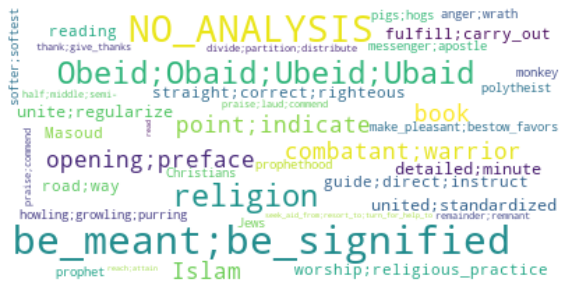

In [47]:
## variables
parameter = "stemgloss"
gen = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Filtered]

frequencies = freqs_counter(gen, 40)
write_freqs_file(frequencies, parameter)
make_wordcloud(frequencies)


### 4.3 Relative frequencies of Part-Of-Speech-Tags (unfiltered text)

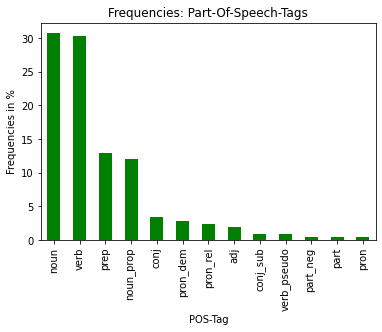

In [48]:
import matplotlib.pyplot as plt

# selecting the required parameter
parameter = "pos"
gen = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Disambiguated]


# conversion to %
output = {}
counts = freqs_counter(gen, 20)
for key in counts.keys():
    output[key] = counts[key]*100/len(sample.Disambiguated)


pd.Series(output).plot(kind="bar",
                       title="Frequencies: Part-Of-Speech-Tags",
                       xlabel="POS-Tag",
                       ylabel="Frequencies in %",
                       colormap="ocean")
plt.savefig(f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_barchart.png")
plt.show()

## 5 Named Entity Recognition (NER)

In [49]:
import NER

sample.Names = NER.NER_getter(sample.Tokenized)

written successfully to: ./output/67-1_6_PERS_freqs.csv


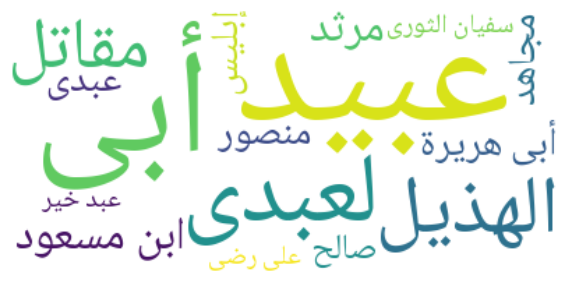

In [50]:
## variables
parameter = "PERS"
names_abbr = {"PERS" : "person", "LOC": "location", "ORG": "organization", "MISC": "other"}
gen = [Name for Name in sample.Names[parameter]]

if len(gen) > 0:
    frequencies = freqs_counter(gen, 20)
    write_freqs_file(frequencies, parameter)
    make_wordcloud(frequencies)
else:
    print(f"No {names_abbr[parameter]} identified")

## 6 From Sample to Corpus

### 6.1 Exporting Data to file format keeping object structure using pickle

#### 6.1.1 Writing pickle

In [51]:
import pickle
with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.pkl', 'wb') as outp:
    pickle.dump(sample, outp, pickle.HIGHEST_PROTOCOL)

#### 6.1.2 loading pickle

In [52]:
# with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.pkl', 'rb') as inp:
#     sample = pickle.load(inp)

### 6.1 Exporting Data to human readable format: JSON
#### 6.2.1 Writing JSON

In [53]:
# import json

# with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.json', 'w', encoding='utf8') as json_file:
#     json.dump(sample.__dict__, json_file, ensure_ascii=False)

#### 6.2.2 Reading JSON

In [54]:
# with open(f'./dumps/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_dump.json', 'r', encoding='utf8') as json_file:
#     sample_json = json.load(json_file)